In [1]:
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [2]:
inputs = pd.read_csv("/kaggle/input/amazon-kaggle-with-pca/Amazon_Kaggle_with_PCA.csv", delimiter=',')
outputs = pd.read_csv("/kaggle/input/train-test-amazon1/train_test_amazon1.sample", header = None, delimiter=' ')

In [3]:
inputs = inputs.drop(columns=['Unnamed: 0'])
print(inputs)
outputs = outputs.filter([11])
print(outputs)

              0         1         2         3         4         5         6  \
0      1.770261 -1.259299 -4.137274  0.219519 -2.272145  1.261023 -0.832089   
1      0.111547 -0.923248 -0.515758  0.358302 -0.468171  0.811812  0.583574   
2     -0.795466  0.113435  0.751907 -0.610852  1.150108  0.022268 -1.790796   
3      0.650470 -1.399842 -0.406764 -0.761072  0.248319 -0.067045 -1.038479   
4      1.513254 -0.368222 -0.461411 -0.338803 -0.110288  1.393196  0.088838   
...         ...       ...       ...       ...       ...       ...       ...   
32764  0.038324  0.608743  0.115501 -1.488739 -0.116374  0.335744 -0.894558   
32765 -0.386422  0.182174  1.162071 -0.652403  1.066914  0.587248 -1.537257   
32766  0.402048 -0.377368  0.286475 -0.059459 -0.857581 -2.173894 -0.101953   
32767 -1.283080  0.669593  0.746969 -0.147694  0.276069 -0.065078 -0.724832   
32768 -0.971727  0.479671 -0.576030  0.195303 -0.891990  0.574659  0.807037   

              7         8         9        10  
0  

In [4]:
X = inputs
y = outputs
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Label encode the target variable (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize parameters
max_score = 0
best_estimator = 50
best_learning_rate = 1.0
n_estimator_list = [50, 100, 150, 200]
learning_rate_list = [1.0, 2.0, 3.0, 5.0, 7.0, 9.0]

for e_ in n_estimator_list:
    for l_ in learning_rate_list:
        abc = AdaBoostClassifier(n_estimators=e_, learning_rate=l_)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        score = cross_val_score(abc, X, y_encoded, cv=skf)
        score_mean = score.mean()
        if score_mean > max_score:
            best_scores = score
            max_score = score_mean
            best_estimator = e_
            best_learning_rate = l_

            # Fit the classifier to get probabilities
            y_probs = cross_val_predict(abc, X, y_encoded, cv=skf, method='predict_proba')

            # Calculate other metrics
            f1_score_value = cross_val_score(abc, X, y_encoded, cv=skf, scoring='f1')
            recall_score_value = cross_val_score(abc, X, y_encoded, cv=skf, scoring='recall')
            precision_score_value = cross_val_score(abc, X, y_encoded, cv=skf, scoring='precision')

# Print best scores, estimator, learning rate
print(f"Best Estimator: {best_estimator}, Best Learning Rate: {best_learning_rate}")
print(f"Best Cross-Validation Score: {max_score}")


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Estimator: 150, Best Learning Rate: 1.0
Best Cross-Validation Score: 1.0


In [6]:
print("Cross-validation scores: {}".format(best_scores))
print("Average cross-validation score: {:.8f}".format(max_score))
print("Standard Deviation of scores: {:.8f}".format(best_scores.std()))
print("Best n_estimator and learning rate: ", best_estimator, best_learning_rate)

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.00000000
Standard Deviation of scores: 0.00000000
Best n_estimator and learning rate:  150 1.0


In [7]:
f1_score_final = f1_score_value.mean()
recall_final = recall_score_value.mean()
precision_final = precision_score_value.mean()

In [8]:
print("Average F1 score: ", f1_score_final)
print("Average Recall score: ", recall_final)
print("Average Precision score: ", precision_final)

Average F1 score:  1.0
Average Recall score:  1.0
Average Precision score:  1.0


In [9]:
y_probs_positive = y_probs[:, 1]
fpr, tpr, _ = roc_curve(y, y_probs_positive)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y, y_probs_positive)
average_precision = average_precision_score(y, y_probs_positive)

tpr_final = tpr.mean()
fpr_final = fpr.mean()

In [10]:
print('Average tpr:',tpr_final)
print('Average fpr:',fpr_final)

Average tpr: 0.5161214012562837
Average fpr: 0.007113285879667001


Average Area Under the PR Curve score:  1.0


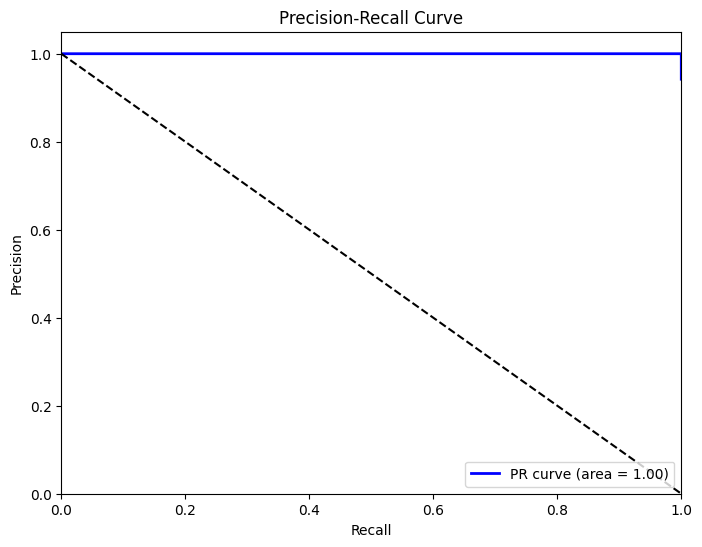

In [11]:
print("Average Area Under the PR Curve score: ", average_precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = {0:0.2f})'.format(average_precision))
plt.plot([0,1],[1,0], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/abc_S5KCV_prc_amazon.png')
plt.show()

Average Area Under the ROC Curve score:  1.0


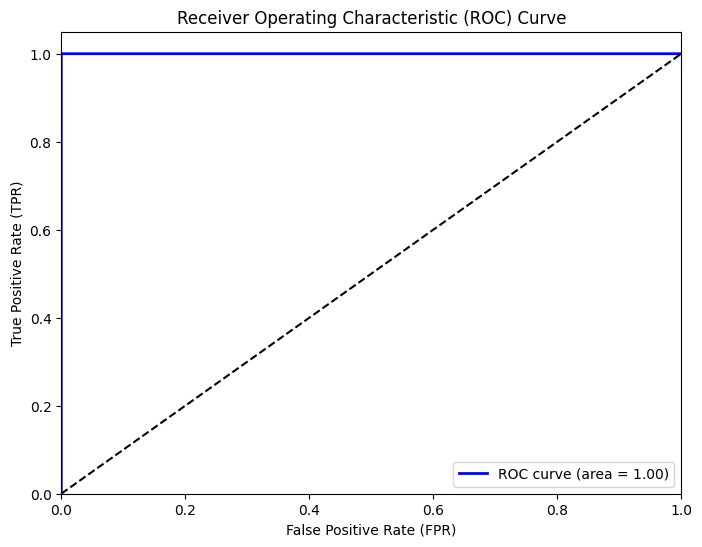

In [12]:
print("Average Area Under the ROC Curve score: ", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/abc_S5KCV_roc_amazon.png')
plt.show()

In [13]:
output_file_path = '/kaggle/working/adaboost_amazon_scores.txt'
with open(output_file_path, 'w') as f: 
    f.write("F1 Score: {}\n".format(f1_score_final)) 
    f.write("Precision: {}\n".format(precision_final)) 
    f.write("Recall: {}\n".format(recall_final)) 
    f.write("PRC AUC: {}\n".format(average_precision)) 
    f.write("ROC AUC: {}\n".format(roc_auc)) 
    f.write("TPR: {}\n".format(tpr)) 
    f.write("FPR: {}\n".format(fpr))

In [14]:


import json

# Assuming tpr and fpr are NumPy arrays
print("Type of f1:", type(f1_score_final))
print("Type of precision:", type(precision_final))
print("Type of recall:", type(recall_final))
print("Type of tpr_value:", type(tpr_final))
print("Type of fpr_value:", type(fpr_final))
print("Type of roc_auc:", type(roc_auc))
print("Type of prc_auc:", type(average_precision))
print("Type of tpr:", type(tpr))
print("Type of fpr:", type(fpr))

precision_list = precision.tolist()
recall_list = recall.tolist()
tpr_list = tpr.tolist()
fpr_list = fpr.tolist()

#print(f1.type())

data = {
    "Average F1 Score": float(f1_score_final), 
    "Average Precision": float(precision_final), 
    "Average Recall": float(recall_final), 
    "Average True Positive Rate": float(tpr_final), 
    "Average False Positive Rate": float(fpr_final), 
    "Average ROC AUC": roc_auc, 
    "Average PRC AUC": average_precision,
    "TPR Array" : tpr_list,
    "FPR Array" : fpr_list,
    "Precision Array": precision_list, 
    "Recall Array": recall_list
}

# Specify the file path
file_path = "/kaggle/working/Adaboost - Real PCA - Lenny.json"

# Write the data to a JSON file
with open(file_path, "w") as json_file:
    json.dump(data, json_file)

Type of f1: <class 'numpy.float64'>
Type of precision: <class 'numpy.float64'>
Type of recall: <class 'numpy.float64'>
Type of tpr_value: <class 'numpy.float64'>
Type of fpr_value: <class 'numpy.float64'>
Type of roc_auc: <class 'numpy.float64'>
Type of prc_auc: <class 'numpy.float64'>
Type of tpr: <class 'numpy.ndarray'>
Type of fpr: <class 'numpy.ndarray'>
